<a href="https://colab.research.google.com/github/ASR16arif/Machine-Learning/blob/main/NIDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install keggle

!pip install kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asrarif","key":"be07789079edad86d416ac2615c24996"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d galaxyh/kdd-cup-1999-data

Dataset URL: https://www.kaggle.com/datasets/galaxyh/kdd-cup-1999-data
License(s): unknown
 95% 83.0M/87.8M [00:01<00:00, 53.4MB/s]
100% 87.8M/87.8M [00:01<00:00, 49.7MB/s]


In [ ]:
!unzip kdd-cup-1999-data.zip

Archive:  kdd-cup-1999-data.zip
  inflating: corrected.gz            
  inflating: corrected/corrected     
  inflating: kddcup.data.corrected   
  inflating: kddcup.data.gz          
  inflating: kddcup.data/kddcup.data  
  inflating: kddcup.data_10_percent.gz  
  inflating: kddcup.data_10_percent/kddcup.data_10_percent  
  inflating: kddcup.data_10_percent_corrected  
  inflating: kddcup.names            
  inflating: kddcup.newtestdata_10_percent_unlabeled.gz  
  inflating: kddcup.newtestdata_10_percent_unlabeled/kddcup.newtestdata_10_percent_unlabeled  
  inflating: kddcup.testdata.unlabeled.gz  
  inflating: kddcup.testdata.unlabeled/kddcup.testdata.unlabeled  
  inflating: kddcup.testdata.unlabeled_10_percent.gz  
  inflating: kddcup.testdata.unlabeled_10_percent/kddcup.testdata.unlabeled_10_percent  
  inflating: training_attack_types   
  inflating: typo-correction.txt     


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from joblib import dump, load
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier



import sys
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU, Bidirectional, BatchNormalization,Convolution1D,MaxPooling1D, Reshape, GlobalAveragePooling1D
from keras.utils import to_categorical
import sklearn.preprocessing
from sklearn import metrics
from scipy.stats import zscore
from tensorflow.keras.utils import get_file, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interpolate
from itertools import cycle
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import sklearn.metrics as metrics

In [ ]:
df = pd.read_csv('kddcup.data_10_percent_corrected')

In [ ]:
df.head()


,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,...,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [ ]:
print(df.columns)

Index(['0', 'tcp', 'http', 'SF', '181', '5450', '0.1', '0.2', '0.3', '0.4',
       '0.5', '1', '0.6', '0.7', '0.8', '0.9', '0.10', '0.12', '0.13', '0.14',
       '0.15', '0.16', '8', '8.1', '0.00', '0.00.1', '0.00.2', '0.00.3',
       '1.00', '0.00.4', '0.00.5', '9', '9.1', '1.00.1', '0.00.6', '0.11',
       '0.00.7', '0.00.8', '0.00.9', '0.00.10', '0.00.11', 'normal.'],
      dtype='object')


In [ ]:
X = df.drop(columns=['normal.'])  # Drop the target column from features
y = df['normal.']

In [ ]:
print(y)

0         normal.
1         normal.
2         normal.
3         normal.
4         normal.
           ...   
494015    normal.
494016    normal.
494017    normal.
494018    normal.
494019    normal.
Name: normal., Length: 494020, dtype: object


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode the target labels to numeric values
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
# One-hot encode categorical features if needed (tcp, http, etc.)
X = pd.get_dummies(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Standardize the feature data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Reshape the data to fit the CNN model. The input to CNN is 4D (samples, height, width, channels).
# We'll reshape it as (samples, features, 1, 1) to match the expected input shape for Conv2D.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

In [ ]:
# Convert target labels to one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

In [ ]:
# Reshape the data for Conv1D: (samples, features, 1)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# Build the CNN model
model = Sequential()

In [ ]:
# First convolutional layer with Conv1D
model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Second convolutional layer with Conv1D
model.add(Conv1D(64, 3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

In [ ]:
# Flatten the output for the dense layers
model.add(Flatten())

In [ ]:
# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

In [ ]:
# Output layer with softmax activation for multi-class classification
model.add(Dense(y_train.shape[1], activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 116, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 58, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 56, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 28, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1792)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         229,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 23)                  │           2,967 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 238,807 (932.84 KB)

 Trainable params: 238,807 (932.84 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the CNN model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
5404/5404 ━━━━━━━━━━━━━━━━━━━━ 126s 23ms/step - accuracy: 0.9889 - loss: 0.0898 - val_accuracy: 0.9985 - val_loss: 0.0079
Epoch 2/10
5404/5404 ━━━━━━━━━━━━━━━━━━━━ 144s 23ms/step - accuracy: 0.9978 - loss: 0.0092 - val_accuracy: 0.9985 - val_loss: 0.0073
Epoch 3/10
5404/5404 ━━━━━━━━━━━━━━━━━━━━ 138s 23ms/step - accuracy: 0.9985 - loss: 0.0058 - val_accuracy: 0.9992 - val_loss: 0.0044
Epoch 4/10
5404/5404 ━━━━━━━━━━━━━━━━━━━━ 143s 23ms/step - accuracy: 0.9987 - loss: 0.0050 - val_accuracy: 0.9988 - val_loss: 0.0052
Epoch 5/10
5404/5404 ━━━━━━━━━━━━━━━━━━━━ 140s 23ms/step - accuracy: 0.9989 - loss: 0.0051 - val_accuracy: 0.9990 - val_loss: 0.0050
Epoch 6/10
5404/5404 ━━━━━━━━━━━━━━━━━━━━ 149s 24ms/step - accuracy: 0.9990 - loss: 0.0045 - val_accuracy: 0.9993 - val_loss: 0.0031
Epoch 7/10
5404/5404 ━━━━━━━━━━━━━━━━━━━━ 136s 23ms/step - accuracy: 0.9989 - loss: 0.0044 - val_accuracy: 0.9993 - val_loss: 0.0033
Epoch 8/10
5404/5404 ━━━━━━━━━━━━━━━━━━━━ 124s 23ms/step - accuracy: 

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_acc * 100:.2f}%')


4632/4632 ━━━━━━━━━━━━━━━━━━━━ 26s 5ms/step - accuracy: 0.9994 - loss: 0.0036
Test Accuracy: 99.94%


In [ ]:
# Predict the labels for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_test_labels = np.argmax(y_test, axis=1)

4632/4632 ━━━━━━━━━━━━━━━━━━━━ 46s 10ms/step


In [ ]:
# Generate the classification report
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_labels, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       655
           1       1.00      0.75      0.86        12
           2       1.00      0.50      0.67         2
           3       1.00      0.73      0.84        11
           4       1.00      1.00      1.00         3
           5       0.98      0.97      0.98       381
           6       1.00      1.00      1.00         6
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00     31985
          10       0.82      1.00      0.90        60
          11       1.00      1.00      1.00     29155
          12       1.00      1.00      1.00         1
          13       0.00      0.00      0.00         2
          14       0.99      1.00      0.99        70
          15       1.00      0.99      1.00       327
          16       0.00      0.00      0.00         2
          17       1.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred)
print(conf_matrix)

[[  653     0     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     0     0]
 [    0     9     0     0     0     0     0     0     0     0     0     2
      0     0     0     0     0     0     0     0     1     0]
 [    0     0     1     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     1     0]
 [    0     0     0     8     0     0     0     0     0     0     1     2
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     3     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0   371     0     0     0     0     4     6
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     0     6     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0]
 [    0     0     0     0     0     1    

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

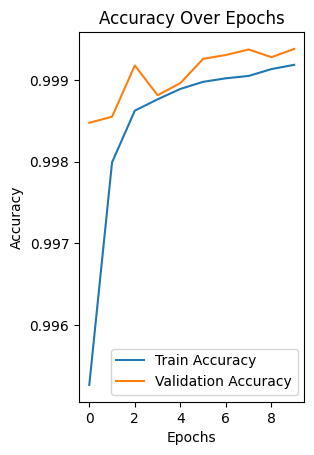

In [ ]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

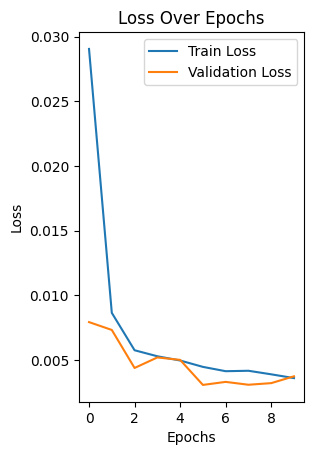

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()